7.16 Direct standardization

In [9]:
import numpy as np
import cvxpy as cp
import pandas as pd
from matplotlib import pyplot as plt

n, N, Ex, y, x, p_true, p_empirical

In [4]:
n = 4
N = 171

Ex = np.matrix([  0.5266,  16.6962,  2.7494,  2.5215, ]).T

y = np.matrix([
          6,
          6,
         10,
         10,
          6,
         15,
         12,
         16,
         14,
         10,
          5,
          8,
         11,
         17,
          6,
         18,
         11,
         11,
         11,
         20,
         10,
         16,
         11,
         11,
          9,
          6,
          8,
         16,
          5,
         10,
         10,
         12,
          6,
         15,
         10,
         10,
          8,
         14,
         10,
         10,
         14,
         18,
         16,
          9,
         15,
         15,
          9,
          1,
          1,
          1,
         12,
         13,
          1,
         11,
          1,
         11,
         10,
          1,
         14,
         13,
         10,
         15,
          1,
          7,
          7,
         16,
          1,
         14,
         16,
         10,
          9,
          9,
         11,
         15,
         13,
          9,
          8,
         18,
         10,
         10,
          7,
          8,
         10,
          8,
          6,
          1,
         17,
         14,
          7,
          9,
         12,
         11,
          6,
         13,
         12,
         11,
          1,
         12,
          1,
         18,
         13,
          8,
         15,
          8,
         10,
          8,
          8,
         12,
          8,
         14,
          1,
          9,
          1,
          1,
         14,
         11,
         14,
         10,
          9,
          9,
          8,
         12,
         10,
         11,
         12,
         14,
         11,
         13,
         11,
         12,
         10,
          1,
         13,
         11,
         13,
         11,
          1,
         10,
         11,
         11,
         11,
          8,
         14,
         11,
          1,
         10,
          9,
          8,
          8,
         10,
         16,
         13,
         12,
         15,
         12,
          1,
         11,
         12,
         11,
          5,
         10,
         10,
          7,
          1,
          1,
          8,
          1,
          9,
         16,
          7,
          9,
]).T

x = np.matrix([
     [1,     18,      4,      4],
     [1,     17,      1,      1],
     [1,     15,      1,      1],
     [1,     16,      3,      3],
     [1,     17,      4,      4],
     [0,     15,      3,      4],
     [1,     15,      2,      1],
     [0,     15,      2,      2],
     [1,     16,      4,      4],
     [1,     16,      3,      3],
     [0,     17,      3,      2],
     [1,     16,      2,      2],
     [0,     15,      2,      2],
     [0,     15,      4,      4],
     [1,     15,      2,      3],
     [0,     15,      4,      3],
     [1,     15,      3,      4],
     [0,     15,      2,      2],
     [1,     16,      3,      3],
     [0,     16,      4,      3],
     [1,     16,      2,      1],
     [1,     16,      4,      2],
     [1,     16,      4,      4],
     [1,     16,      1,      1],
     [1,     16,      4,      3],
     [1,     16,      3,      1],
     [1,     15,      2,      2],
     [1,     15,      3,      1],
     [1,     15,      1,      1],
     [0,     15,      4,      0],
     [0,     17,      2,      1],
     [0,     15,      2,      3],
     [1,     15,      3,      2],
     [0,     15,      2,      2],
     [1,     15,      1,      1],
     [0,     16,      2,      2],
     [1,     16,      3,      3],
     [0,     15,      2,      2],
     [1,     15,      1,      1],
     [1,     16,      2,      1],
     [1,     16,      4,      4],
     [0,     16,      3,      3],
     [1,     16,      4,      4],
     [0,     15,      2,      1],
     [1,     15,      1,      2],
     [0,     15,      2,      2],
     [1,     19,      0,      1],
     [0,     18,      2,      2],
     [1,     15,      1,      1],
     [1,     15,      4,      4],
     [0,     16,      1,      1],
     [1,     16,      1,      1],
     [0,     17,      2,      1],
     [1,     15,      1,      1],
     [1,     15,      3,      2],
     [1,     15,      1,      2],
     [0,     15,      2,      1],
     [0,     18,      1,      1],
     [0,     16,      2,      1],
     [0,     17,      1,      2],
     [1,     18,      1,      1],
     [0,     16,      2,      2],
     [0,     17,      2,      1],
     [0,     15,      3,      2],
     [0,     17,      1,      1],
     [1,     16,      4,      2],
     [1,     16,      2,      2],
     [1,     16,      4,      4],
     [0,     16,      1,      0],
     [0,     17,      4,      4],
     [1,     16,      3,      3],
     [0,     17,      4,      3],
     [1,     16,      2,      2],
     [0,     16,      2,      1],
     [1,     16,      2,      3],
     [1,     17,      1,      1],
     [0,     17,      1,      2],
     [1,     17,      4,      4],
     [1,     17,      1,      1],
     [1,     16,      1,      1],
     [1,     17,      4,      3],
     [0,     18,      2,      2],
     [1,     17,      4,      4],
     [0,     18,      3,      3],
     [1,     17,      2,      1],
     [1,     17,      1,      1],
     [1,     16,      2,      3],
     [1,     16,      4,      4],
     [1,     18,      3,      1],
     [0,     18,      2,      1],
     [1,     17,      2,      1],
     [0,     17,      2,      2],
     [0,     16,      1,      1],
     [0,     17,      2,      2],
     [1,     16,      2,      1],
     [1,     17,      2,      1],
     [0,     18,      2,      2],
     [0,     17,      4,      3],
     [1,     18,      2,      1],
     [0,     16,      2,      1],
     [0,     17,      2,      3],
     [0,     22,      3,      1],
     [0,     16,      0,      2],
     [0,     18,      3,      2],
     [0,     16,      3,      3],
     [0,     18,      2,      1],
     [0,     16,      2,      1],
     [0,     17,      2,      1],
     [0,     17,      1,      1],
     [0,     18,      2,      1],
     [1,     17,      2,      2],
     [1,     17,      3,      3],
     [1,     18,      2,      2],
     [1,     18,      2,      1],
     [1,     18,      2,      3],
     [1,     18,      1,      1],
     [0,     17,      1,      2],
     [1,     17,      2,      4],
     [1,     18,      3,      2],
     [0,     18,      4,      4],
     [0,     17,      4,      1],
     [1,     18,      1,      1],
     [1,     18,      1,      1],
     [0,     17,      1,      1],
     [1,     17,      1,      1],
     [0,     18,      2,      1],
     [0,     18,      4,      2],
     [1,     18,      2,      1],
     [0,     17,      3,      3],
     [1,     18,      2,      4],
     [1,     19,      1,      1],
     [1,     19,      1,      2],
     [1,     19,      2,      1],
     [0,     19,      1,      2],
     [1,     19,      1,      1],
     [1,     19,      2,      3],
     [1,     18,      2,      1],
     [1,     17,      3,      4],
     [1,     18,      4,      4],
     [1,     17,      2,      2],
     [0,     18,      4,      4],
     [0,     18,      2,      2],
     [1,     17,      2,      4],
     [1,     19,      2,      1],
     [1,     17,      2,      2],
     [1,     18,      2,      3],
     [0,     18,      4,      3],
     [0,     19,      1,      1],
     [0,     19,      1,      1],
     [0,     18,      1,      1],
     [1,     18,      1,      1],
     [1,     18,      1,      4],
     [0,     18,      1,      1],
     [1,     17,      4,      4],
     [1,     17,      1,      2],
     [1,     17,      1,      1],
     [1,     18,      4,      4],
     [0,     18,      1,      2],
     [1,     17,      2,      2],
     [1,     17,      1,      2],
     [1,     18,      1,      1],
     [1,     18,      4,      4],
     [0,     18,      2,      1],
     [0,     19,      1,      1],
     [1,     19,      2,      3],
     [1,     18,      3,      1],
     [1,     18,      1,      1],
     [0,     20,      2,      2],
     [0,     17,      3,      1],
     [0,     21,      1,      1],
     [0,     19,      1,      1],
])

p_true = np.matrix([
      0.096203,
      0.000000,
      0.000000,
      0.002532,
      0.017722,
      0.037975,
      0.022785,
      0.081013,
      0.070886,
      0.141772,
      0.118987,
      0.078481,
      0.078481,
      0.068354,
      0.083544,
      0.040506,
      0.015190,
      0.030380,
      0.012658,
      0.002532,
]).T

p_empirical = np.matrix([
      0.122807,
      0.000000,
      0.000000,
      0.000000,
      0.017544,
      0.046784,
      0.035088,
      0.093567,
      0.076023,
      0.146199,
      0.134503,
      0.076023,
      0.052632,
      0.064327,
      0.046784,
      0.046784,
      0.011696,
      0.023392,
      0.000000,
      0.005848,
]).T

In [103]:
pi = cp.Variable(N)
objective = cp.Maximize(cp.sum(cp.entr(pi)))
constraints = [pi >= 0, cp.sum(pi) == 1, x.T @ pi == np.array(Ex).flatten()]
prob = cp.Problem(objective, constraints)
result = prob.solve()

In [88]:
# compute the empirical distribution
empirical_dist = pd.DataFrame(np.column_stack((y, 1/N * np.ones(N))), columns=['y', 'uni'])
empirical_dist = empirical_dist.groupby('y').sum('uni')
empirical_dist = empirical_dist.reindex(range(1,21), fill_value=0)
empirical_dist = np.array(empirical_dist['uni'])
print(np.linalg.norm(empirical_dist - np.array(p_empirical).flatten()))

1.1758749299313308e-06


In [97]:
weighted_dist = pd.DataFrame(np.column_stack((y, pi.value)), columns=['y', 'pi'])
weighted_dist = weighted_dist.groupby('y').sum('pi')
weighted_dist = weighted_dist.reindex(range(1,21), fill_value=0)
weighted_dist = np.array(weighted_dist['pi'])

In [101]:
print(np.linalg.norm(weighted_dist-np.array(p_true).flatten()))
print(np.linalg.norm(empirical_dist-np.array(p_true).flatten()))

0.0698492917052069
0.060835441418337445


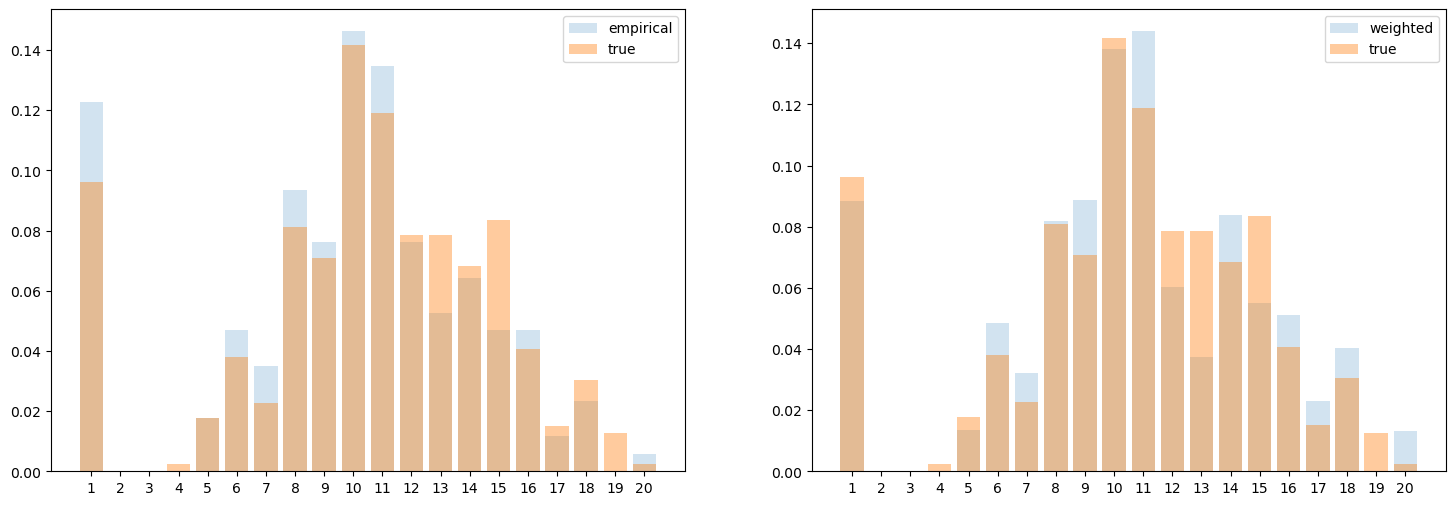

In [106]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
ax1.bar(np.arange(1,21), empirical_dist, align='center', alpha=0.2, label='empirical')
ax1.bar(np.arange(1,21), np.array(p_true).flatten(), align='center', alpha=0.4, label='true')
ax1.set_xticks(np.arange(1,21))
ax1.legend()

ax2.bar(np.arange(1,21), weighted_dist, align='center', alpha=0.2, label='weighted')
ax2.bar(np.arange(1,21), np.array(p_true).flatten(), align='center', alpha=0.4, label='true')
ax2.set_xticks(np.arange(1,21))
ax2.legend()
plt.show()